In [52]:
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from matplotlib import pyplot as plt #used for plots
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
trainingSet = pd.read_pickle("../data/SmoteData")
testSet = pd.read_pickle("../data/IterImput_Test")
trainingSet.head()

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Irrational_thoughts_work,Coping_strategy,Kinesiophobia_physical_exercise,Kinesiophobia_pain_stop,Age,Uses_analgesics,Uses_corticosteroids,Serious_disease,Neurogenic_signals,Continuous_pain,Decreased_mobility,Nocturnal_pain,Weightloss_per_year,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,9.000000,5.0,7.0,8.0,5.0,1.0,0.0,0.0,1.0,1.0,49.0,1.0,4.000000,0.0,1.0,0.000000,0.0,8.0,0.0,0.0,0.0,8.0,0.0
1,1.0,0.0,10.0,1.0,1.0,0.0,0.0,5.0,1.0,4.0,6.709114,8.0,9.0,9.0,8.0,1.0,0.0,0.0,1.0,1.0,36.0,1.0,2.635424,1.0,1.0,1.000000,0.0,6.0,0.0,0.0,0.0,8.0,0.0
2,1.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,10.000000,0.0,10.0,10.0,4.0,0.0,0.0,0.0,0.0,1.0,68.0,1.0,4.000000,0.0,1.0,0.047652,0.0,10.0,0.0,0.0,9.0,9.0,1.0
3,1.0,0.0,10.0,0.0,1.0,0.0,0.0,8.0,1.0,8.0,6.000000,7.0,8.0,8.0,6.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0,2.000000,1.0,1.0,1.000000,0.0,6.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,0.000000,3.0,10.0,10.0,5.0,0.0,0.0,1.0,1.0,1.0,40.0,1.0,3.000000,0.0,1.0,1.000000,0.0,8.0,0.0,0.0,6.0,3.0,0.0


In [66]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(trainingSet.loc[:, trainingSet.columns != 'Treatment'], trainingSet['Treatment'])

GaussianNB()

              precision    recall  f1-score   support

         1.0       0.54      0.22      0.31       128
         2.0       0.26      0.20      0.23        30
         3.0       0.03      0.62      0.06         8
         5.0       0.50      0.21      0.30       141

    accuracy                           0.22       307
   macro avg       0.33      0.31      0.22       307
weighted avg       0.48      0.22      0.29       307



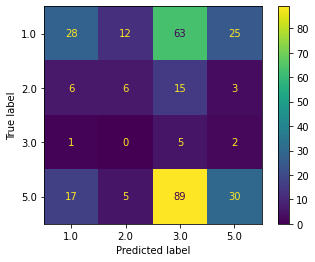

0.40108303249097477

In [67]:
testSetFeatures = testSet.loc[:, trainingSet.columns != 'Treatment']
testSetLabels = testSet['Treatment']

predictions = model.predict(testSetFeatures)
print(classification_report(testSetLabels.values,predictions))

ConfusionMatrixDisplay.from_predictions(testSetLabels.values,predictions)
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(testSetLabels.values, predictions, pos_label=2)
metrics.auc(fpr, tpr)

In [58]:
# Do 2 Naive Bayes instead of just one
naiveBayes1 = GaussianNB() #classify between 1,5 and others

trainingFirst = trainingSet.copy()
trainingFirst.loc[trainingFirst['Treatment'] == 2,'Treatment'] = -1
trainingFirst.loc[trainingFirst['Treatment'] == 3,'Treatment'] = -1
tetsFirst = testSet.copy()
tetsFirst.loc[tetsFirst['Treatment'] == 2,'Treatment'] = -1
tetsFirst.loc[tetsFirst['Treatment'] == 3,'Treatment'] = -1

naiveBayes1.fit(trainingFirst.loc[:, trainingFirst.columns != 'Treatment'], trainingFirst['Treatment'])

GaussianNB()

              precision    recall  f1-score   support

        -1.0       0.32      0.32      0.32        38
         1.0       0.50      0.43      0.46       128
         5.0       0.53      0.60      0.56       141

    accuracy                           0.49       307
   macro avg       0.45      0.45      0.45       307
weighted avg       0.49      0.49      0.49       307



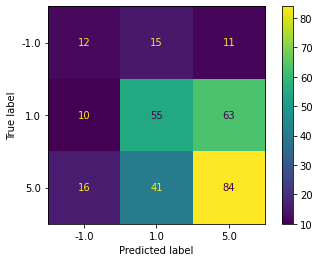

In [59]:
tetsFirstFeatures = tetsFirst.loc[:, tetsFirst.columns != 'Treatment']
testFirstLabels = tetsFirst['Treatment']

predictionsFirst = naiveBayes1.predict(tetsFirstFeatures)
print(classification_report(testFirstLabels.values,predictionsFirst))

ConfusionMatrixDisplay.from_predictions(testFirstLabels.values,predictionsFirst)
plt.show()

In [60]:
# Do 2 Naive Bayes instead of just one
naiveBayes2 = GaussianNB() #classify between 2 and 3

trainingSecond = trainingSet.loc[(trainingSet['Treatment'] == 2) | (trainingSet['Treatment'] == 3)]
tetsSecond = testSet.loc[(testSet['Treatment'] == 2) | (testSet['Treatment'] == 3)]

naiveBayes2.fit(trainingSecond.loc[:, trainingSecond.columns != 'Treatment'], trainingSecond['Treatment'])

GaussianNB()

              precision    recall  f1-score   support

         2.0       0.92      0.37      0.52        30
         3.0       0.27      0.88      0.41         8

    accuracy                           0.47        38
   macro avg       0.59      0.62      0.47        38
weighted avg       0.78      0.47      0.50        38



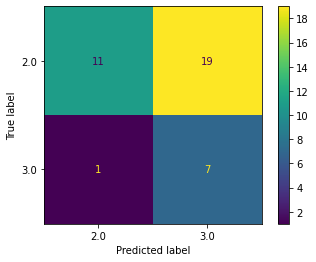

In [61]:
tetsSecondFeatures = tetsSecond.loc[:, tetsSecond.columns != 'Treatment']
testSecondLabels = tetsSecond['Treatment']

predictionsSecond = naiveBayes2.predict(tetsSecondFeatures)
print(classification_report(testSecondLabels.values,predictionsSecond))

ConfusionMatrixDisplay.from_predictions(testSecondLabels.values,predictionsSecond)
plt.show()

              precision    recall  f1-score   support

         1.0       0.50      0.43      0.46       128
         2.0       0.60      0.10      0.17        30
         3.0       0.06      0.25      0.10         8
         5.0       0.53      0.60      0.56       141

    accuracy                           0.47       307
   macro avg       0.42      0.34      0.32       307
weighted avg       0.51      0.47      0.47       307



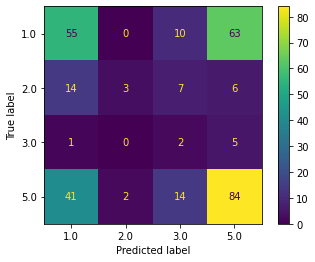

0.35655836341756914

In [68]:
# Combined naive bayes test
testSetFeatures = testSet.loc[:, trainingSet.columns != 'Treatment']
testSetLabels = testSet['Treatment']

predictions1 = naiveBayes1.predict(testSetFeatures)
testSetPred = testSet.copy()
testSetPred.loc[:,'Treatment'] = predictions1

testSetPredOthers = testSetPred.loc[testSetPred['Treatment'] == -1,]
testSetPredOthersFeatures = testSetPredOthers.loc[:, testSetPredOthers.columns != 'Treatment']
predictions2 = naiveBayes2.predict(testSetPredOthersFeatures)

testSetPred.loc[testSetPred['Treatment'] == -1,'Treatment'] = predictions2

finalPredictions = testSetPred['Treatment'].values

print(classification_report(testSetLabels.values,finalPredictions))

ConfusionMatrixDisplay.from_predictions(testSetLabels.values,finalPredictions)
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(testSetLabels.values, finalPredictions, pos_label=2)
metrics.auc(fpr, tpr)